In [23]:
import os
import librosa  # for audio processing
import numpy as np
from sklearn.model_selection import train_test_split

# directories for wav files
dirs = [
    "D:\\scriptie\\sensor_analysis\\CNN-training\\data\\fireworks5-ogg",
    "D:\\scriptie\\sensor_analysis\\CNN-training\\data\\rain5-ogg",
    "D:\\scriptie\\sensor_analysis\\CNN-training\\data\\wind5-ogg",
]




In [24]:
labels = []
data = []

# Loop over all files in all directories
for i, dir in enumerate(dirs):
    for filename in os.listdir(dir):
        if filename.endswith(".ogg"):  # check if it's a .ogg file
            # Load the audio file
            audio, sr = librosa.load(os.path.join(dir, filename), res_type='kaiser_fast')

            # Extract Mel-spectrogram from the audio
            mel_spect = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=1024)
            mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
            melspect_processed = np.mean(mel_spect.T,axis=0)

            # Add the Mel-spectrogram to the data list
            data.append(melspect_processed)

            # Add the label (i.e., the directory index) to the labels list
            labels.append(i)




In [25]:
# Convert data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [26]:
data.shape

(146, 128)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution1D, MaxPooling1D

# number of labels
num_labels = len(dirs)




In [28]:
# Build model
model = Sequential()

model.add(Convolution1D(128, 5, padding='same', input_shape=(128, 1)))  # Adjust input shape if necessary
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Convolution1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [30]:
history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
11/11 [==============================] - 1s 54ms/step - loss: 9.2408 - accuracy: 0.3039 - val_loss: 2.3041 - val_accuracy: 0.4773
Epoch 2/100
11/11 [==============================] - 0s 31ms/step - loss: 4.0688 - accuracy: 0.4020 - val_loss: 0.8319 - val_accuracy: 0.5000
Epoch 3/100
11/11 [==============================] - 0s 31ms/step - loss: 2.5649 - accuracy: 0.4216 - val_loss: 1.0399 - val_accuracy: 0.4318
Epoch 4/100
11/11 [==============================] - 0s 33ms/step - loss: 1.7240 - accuracy: 0.4902 - val_loss: 0.7191 - val_accuracy: 0.7045
Epoch 5/100
11/11 [==============================] - 0s 33ms/step - loss: 0.8477 - accuracy: 0.6863 - val_loss: 0.7428 - val_accuracy: 0.6591
Epoch 6/100
11/11 [==============================] - 0s 31ms/step - loss: 0.9138 - accuracy: 0.6176 - val_loss: 0.7530 - val_accuracy: 0.7273
Epoch 7/100
11/11 [==============================] - 0s 31ms/step - loss: 0.8950 - accuracy: 0.5784 - val_loss: 0.7921 - val_accuracy: 0.7045
Epoch 

11/11 [==============================] - 0s 31ms/step - loss: 0.4485 - accuracy: 0.8529 - val_loss: 0.3404 - val_accuracy: 0.9318
Epoch 59/100
11/11 [==============================] - 0s 32ms/step - loss: 0.4164 - accuracy: 0.8725 - val_loss: 0.3119 - val_accuracy: 0.9318
Epoch 60/100
11/11 [==============================] - 0s 33ms/step - loss: 0.4769 - accuracy: 0.8137 - val_loss: 0.2928 - val_accuracy: 0.9318
Epoch 61/100
11/11 [==============================] - 0s 33ms/step - loss: 0.5085 - accuracy: 0.8235 - val_loss: 0.3847 - val_accuracy: 0.9318
Epoch 62/100
11/11 [==============================] - 0s 32ms/step - loss: 0.3927 - accuracy: 0.8529 - val_loss: 0.3856 - val_accuracy: 0.9318
Epoch 63/100
11/11 [==============================] - 0s 32ms/step - loss: 0.4192 - accuracy: 0.8235 - val_loss: 0.3267 - val_accuracy: 0.9318
Epoch 64/100
11/11 [==============================] - 0s 33ms/step - loss: 0.4348 - accuracy: 0.8529 - val_loss: 0.2938 - val_accuracy: 0.9545
Epoch 65/100

In [31]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test set accuracy: {accuracy * 100}%")

2/2 [==============================] - 0s 15ms/step - loss: 0.3190 - accuracy: 0.9318
Test set accuracy: 93.18181872367859%


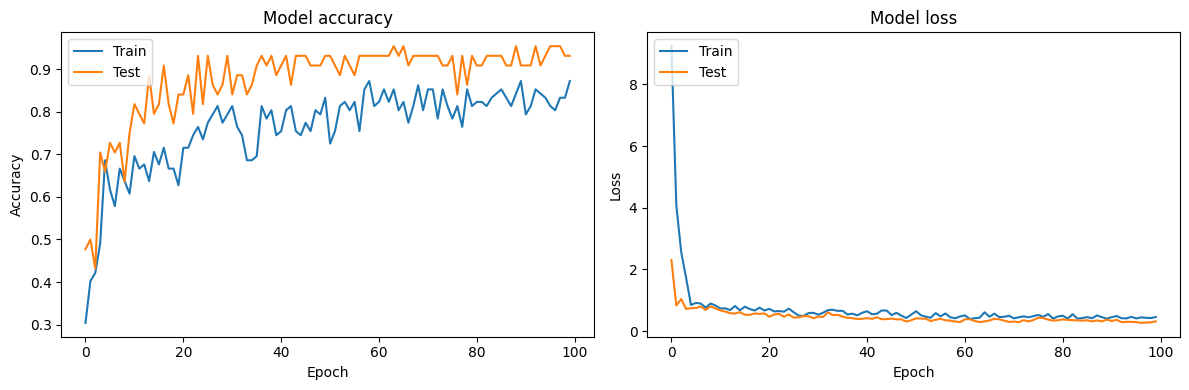

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.90      0.95        10
           2       1.00      0.85      0.92        13

    accuracy                           0.93        44
   macro avg       0.96      0.92      0.93        44
weighted avg       0.94      0.93      0.93        44



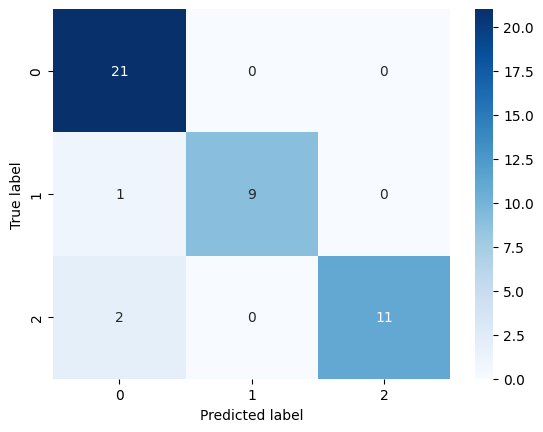

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict class probabilities
y_prob = model.predict(x_test)

# Convert probabilities into class predictions
y_pred = np.argmax(y_prob, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [34]:
# Save the entire model as a SavedModel.
# Save the entire model to a HDF5 file.
model.save('5-ogg-mel.h5')

['.ipynb_checkpoints',
 'CNN.ipynb',
 'csv files',
 'data',
 'data-collection.ipynb',
 'distances.ipynb',
 'extra-data.ipynb',
 'mel_spectrograms',
 'my_model-1-ogg-mel',
 'my_model-1-ogg-mel.h5',
 'my_model-1-ogg-mfcc',
 'my_model-1-ogg-mfcc.h5',
 'my_model-1-wav-mel',
 'my_model-1-wav-mel.h5',
 'my_model-1-wav-mfcc',
 'my_model-1-wav-mfcc.h5',
 'my_model-5-ogg-mel',
 'my_model-5-ogg-mel.h5',
 'my_model-5-ogg-mfcc',
 'my_model-5-ogg-mfcc.h5',
 'my_model-5-wav-mel',
 'my_model-5-wav-mel.h5',
 'my_model-5-wav-mfcc',
 'my_model-5-wav-mfcc.h5',
 'sensor-locations.html',
 'spectrogram_images',
 'splitting-5-to-1-seconds.ipynb',
 'train-1-ogg-mel.ipynb',
 'train-1-ogg-mfcc.ipynb',
 'train-1-wav-mel.ipynb',
 'train-1-wav-mfcc.ipynb',
 'train-5-ogg-mel.ipynb',
 'train-5-ogg-mfcc.ipynb',
 'train-5-wav-mel.ipynb',
 'train-5-wav-mfcc.ipynb',
 'tutorials',
 'UrbanSound8K.tar.gz',
 'wav-to-ogg.ipynb']